In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [6]:
df.rename(columns={'v1':'Category','v2':'Text'},inplace=True)

In [10]:
df.columns

Index(['Category', 'Text'], dtype='object')

In [7]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

df['Category'] = en.fit_transform(df['Category'])

In [13]:
df.sample(13)

,Category,Text
1895,0,"Uh, heads up we don't have THAT much left"
1213,0,"Yeah, probably but not sure. Ilol let u know, ..."
4747,0,The beauty of life is in next second.. which h...
3994,0,R u in this continent?
1896,0,I tot u outside cos darren say u come shopping...
3394,0,Then i buy.
925,0,"K, wait chikku..il send aftr &lt;#&gt; mins"
5215,0,I keep ten rs in my shelf:) buy two egg.
2429,1,Guess who am I?This is the first time I create...
1625,0,Hi Dear Call me its urgnt. I don't know whats ...


In [9]:
df.isnull().sum()  #Missing Values

Category    0
Text        0
dtype: int64

In [10]:
df.duplicated().sum() #Duplicated Values

np.int64(403)

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

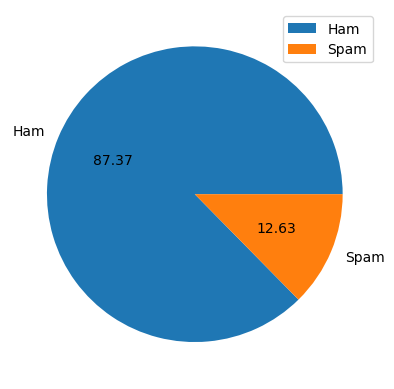

In [13]:
import matplotlib.pyplot as plt

plt.pie(df.Category.value_counts(), labels=('Ham','Spam'),autopct="%0.2f")
plt.legend()
plt.show()

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nailw_natsfqq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['Word_count'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Word_count']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Word_count, Length: 5169, dtype: int64

In [16]:
df['Char_count'] = df['Text'].apply(len)
df['Char_count']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Char_count, Length: 5169, dtype: int64

In [17]:
df.head()

,Category,Text,Word_count,Char_count
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [18]:
df[df['Category'] == 0][['Text','Char_count','Word_count']].describe() #ham

,Char_count,Word_count
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [19]:
df[df['Category'] == 1][['Text','Char_count','Word_count']].describe() #spam

,Char_count,Word_count
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [20]:
import seaborn as sns

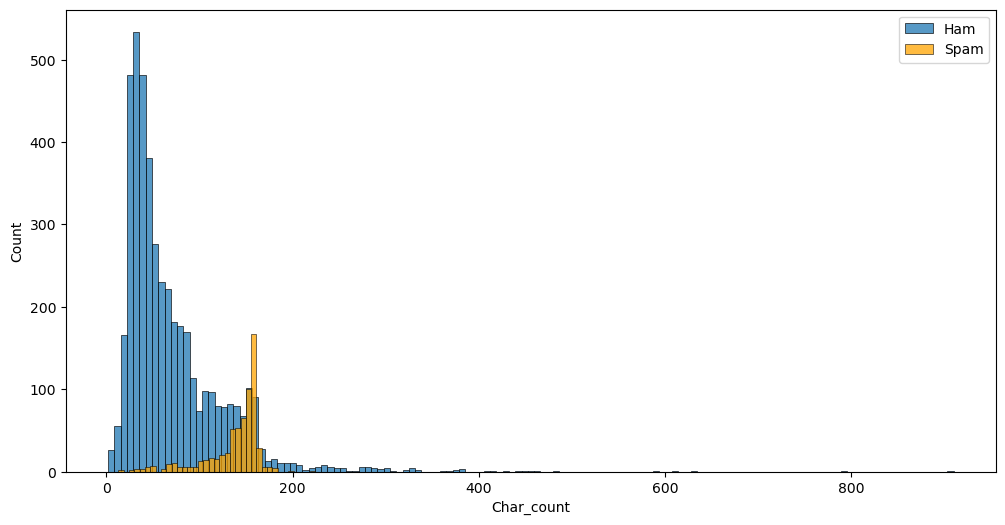

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['Char_count'])
sns.histplot(df[df['Category']==1]['Char_count'], color='orange')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

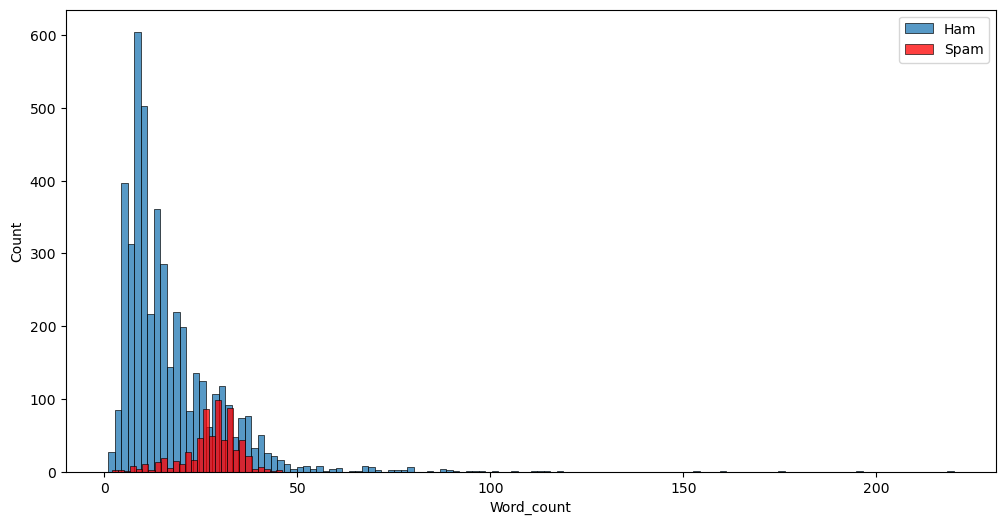

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['Word_count'])
sns.histplot(df[df['Category']==1]['Word_count'], color='red')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

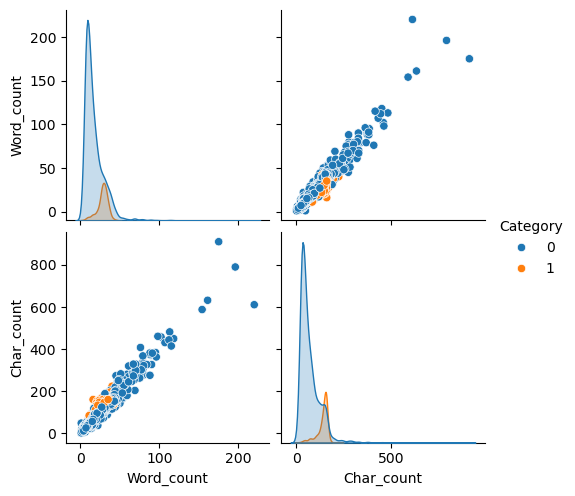

In [32]:
sns.pairplot(df,hue='Category')

<Axes: >

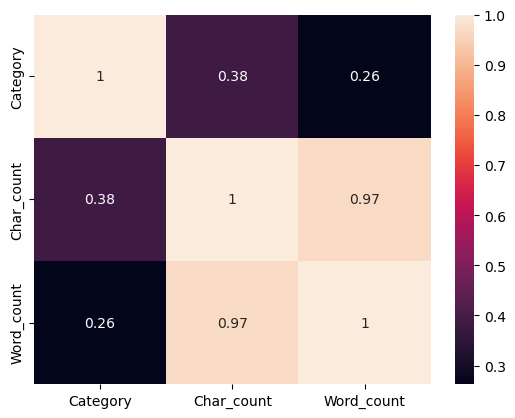

In [22]:
sns.heatmap(df[['Category','Char_count','Word_count']].corr(),annot=True)


In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

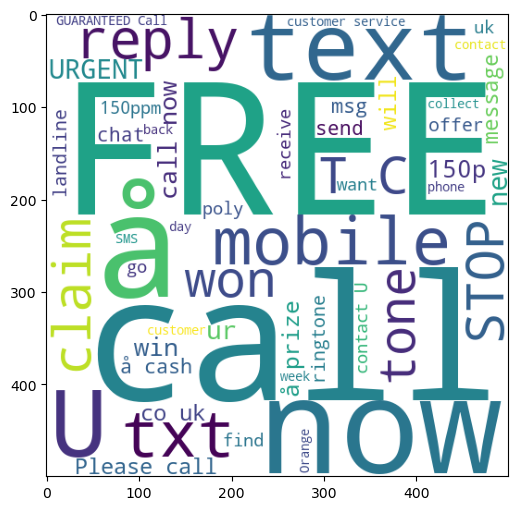

In [24]:
spam_wc = wc.generate(df[df['Category']==1]['Text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

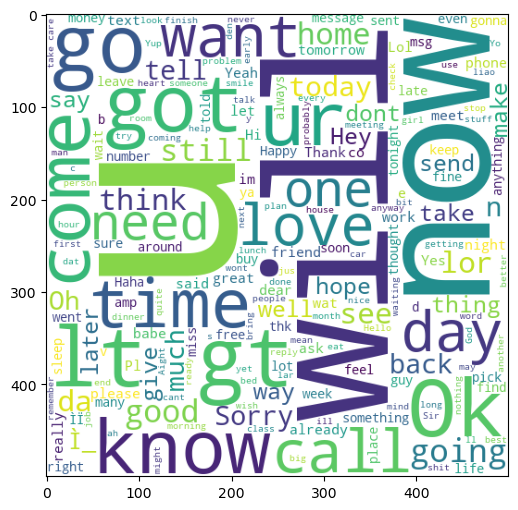

In [39]:
spam_wc = wc.generate(df[df['Category']==0]['Text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [26]:
x = tfidf.fit_transform(df['Text']).toarray()
x
y = df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [29]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [30]:
gnb.fit(x_train, y_train)
pred1 = gnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred1))
print("Precision: ", precision_score(y_test, pred1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred1))

Accuracy:  0.902321083172147
Precision:  0.5911330049261084

Confusion Matrix: 
 [[813  83]
 [ 18 120]]


In [31]:
bnb.fit(x_train, y_train)
pred2 = bnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred2))
print("Precision: ", precision_score(y_test, pred2))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred2))

Accuracy:  0.9854932301740812
Precision:  0.9767441860465116

Confusion Matrix: 
 [[893   3]
 [ 12 126]]


In [32]:
mnb.fit(x_train, y_train)
pred2 = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred2))
print("Precision: ", precision_score(y_test, pred2))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred2))

Accuracy:  0.9748549323017408
Precision:  1.0

Confusion Matrix: 
 [[896   0]
 [ 26 112]]
